# CSE 572: Homework 3

This notebook provides a template and starting code to implement the Homework 3 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

Name - Swarali Chine

ASU ID - 1222583687

## Real or spurious clusters?

An important question in assessing cluster validity is whether we are finding real patterns in structured data or finding patterns in noise or random data.

In this homework, you are given a dataset from an unknown source with unknown attributes. You are asked to cluster the data into 3 clusters using K-means clustering. Your goal is to evaluate whether the clusters you find in the dataset are due to real structure in the data or just patterns in noise. You can use any method we have discussed in class or in the Data Mining textbook to solve this problem. Show all of your work and then answer the question in the final Question cell.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1aALuGEy92Z_Lk3BqeKx09IwgVZn615Z6', header=None)
data.sample(10)

0      1      2      3      4      5      6      7      8      9   ...  \
26   80.0  125.0  172.0   82.0  127.0    0.0   60.0   42.0  244.0  130.0  ...   
86   44.0  216.0   97.0  191.0  203.0   80.0    4.0  244.0  240.0   13.0  ...   
2    27.0  161.0  104.0   91.0  223.0  162.0  228.0    0.0  219.0  139.0  ...   
55   74.0   75.0  209.0  174.0    1.0  249.0  151.0  126.0  135.0   32.0  ...   
75   90.0  214.0   61.0   20.0  136.0   22.0  240.0  211.0  130.0   19.0  ...   
93  254.0   17.0   71.0  100.0   48.0  246.0  132.0  133.0  193.0   13.0  ...   
16  207.0  234.0  191.0  105.0   43.0  218.0   31.0   36.0   44.0  107.0  ...   
73  224.0   55.0  154.0   62.0  245.0  181.0  215.0  194.0   30.0   59.0  ...   
54    9.0  250.0  224.0  168.0  143.0  234.0  120.0  195.0  223.0   94.0  ...   
95  111.0  126.0  126.0  167.0   11.0  252.0  183.0  253.0   79.0    5.0  ...   

       54     55     56     57     58     59     60     61     62     63  
26  185.0   51.0   93.0  149.0    7.0  231.0   20.0   68.0  175.0   39.0  
86  210.0  248.0   16.0  234.0  251.0  108.0   95.0   83.0  247.0  151.0  
2   129.0   78.0   53.0   80.0  191.0  230.0   84.0   87.0   70.0  130.0  
55  161.0    8.0   69.0   97.0  218.0   92.0  140.0   75.0  196.0  211.0  
75  150.0  162.0   41.0  109.0   62.0  167.0  149.0   86.0   74.0  198.0  
93  251.0  144.0   47.0  250.0  200.0   37.0   83.0    9.0  183.0  120.0  
16  246.0  181.0  242.0   55.0  235.0  241.0   27.0  180.0  109.0  198.0  
73   91.0    3.0   70.0  138.0  234.0    0.0   17.0  211.0  205.0  113.0  
54   21.0  204.0  159.0   60.0  159.0  172.0   78.0  207.0  102.0  227.0  
95   34.0  167.0  222.0    0.0   31.0   88.0  204.0  148.0  214.0  215.0  

[10 rows x 64 columns]

In [8]:
from sklearn.cluster import KMeans
km3 = KMeans(n_clusters=3,init='random',n_init=1,random_state=0)
km3.fit(data)

KMeans(init='random', n_clusters=3, n_init=1, random_state=0)

In [9]:
print("SSE {}" . format( km3.inertia_))

SSE 32435472.25753639


In [10]:
np.random.seed(0)
random_df = pd.DataFrame(np.random.randint(int(data.to_numpy().min()),int(data.to_numpy().max()),size=(100, 64)))

In [11]:
from sklearn.cluster import KMeans
sse = []

for i in range(500):
    kmeans = KMeans(n_clusters=3,init='random',n_init=1,random_state=i)
    kmeans.fit(random_df)
    sse.append(kmeans.inertia_)

(array([ 24.,  95., 167., 133.,  64.,  11.,   4.,   1.,   0.,   1.]),
 array([31547087.97080232, 31646878.30379455, 31746668.63678678,
        31846458.96977901, 31946249.30277125, 32046039.63576348,
        32145829.96875571, 32245620.30174794, 32345410.63474018,
        32445200.96773241, 32544991.30072464]),
 <a list of 10 Patch objects>)

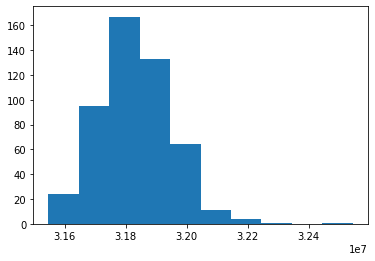

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(sse)


**Question: Does your clustering represent real or spurious patterns in the data? Explain your answer.**

**Answer:**

YOUR ANSWER HERE : The clustering represent spurious patterns. Compared it with random data and random data is giving better sse than real data.